# Import packages, load features 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%cd "/data/groups/ag_kircher/"
features_IH01 = pd.read_csv("cfDNA-reanalysis_Graz/kristin/rf_model/IH01/features.csv", sep = "\t", index_col = 0, header = 0)
features_IC17 = pd.read_csv("cfDNA-reanalysis_Graz/kristin/rf_model/IC17/features.csv", sep = "\t", index_col = 0, header = 0) 

/fast/home/groups/ag_kircher


# Split into trainings and test set  

In [3]:
##training and test data 

from sklearn.model_selection import train_test_split

train, test= train_test_split(features_IH01, test_size = 0.25, random_state = 42)

display(train.shape)
display(test.shape)
train


(8457, 39)

(2819, 39)

,205,202,199,196,193,190,187,185,182,180,...,median_wps_upstream1kb,var_wps_upstream1kb,variance_wps_2k,mean_wps_2k,median_wps_2k,amp1,amp2,ndr_width1,ndr_width2,monocytes
ENSG00000204410,231119.158529,284023.213171,393252.635053,3.163475e+05,1.670018e+05,1.224154e+05,1.686213e+05,1.622524e+05,1.224241e+05,1.593435e+05,...,-16.0,106.992256,86.733034,-15.5365,-15.0,9.087497,10.349571,100,201,0.925999
ENSG00000092621,120979.260383,165760.010534,314222.804238,4.176195e+05,3.070609e+05,1.951628e+05,3.306736e+05,3.922548e+05,2.221221e+05,1.219618e+05,...,-53.0,207.620860,175.690915,-53.5305,-53.0,9.311487,25.922968,139,227,0.765535
ENSG00000143155,122808.452415,378947.251359,764924.079402,7.906882e+05,4.473528e+05,2.937241e+05,1.259068e+06,2.652623e+06,2.154396e+06,9.357492e+05,...,-28.5,243.661613,198.857026,-29.3015,-27.0,13.633186,22.690285,225,367,4.485427
ENSG00000159259,92613.664935,245168.251266,297723.582734,5.197777e+05,1.047857e+06,1.074078e+06,6.692630e+05,4.969871e+05,4.097995e+05,3.758713e+05,...,-32.0,170.897982,221.620330,-28.9555,-30.0,12.324794,5.363589,192,347,0.847997
ENSG00000137944,757069.457678,706590.303643,707517.888755,1.131772e+06,1.188585e+06,5.850100e+05,2.262754e+05,2.781393e+05,3.265971e+05,2.381555e+05,...,-27.0,108.408372,119.330493,-20.1835,-19.0,10.171494,18.628757,207,350,3.776104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000147416,187760.850474,342261.196073,286993.353726,2.131697e+05,2.107983e+05,3.162274e+05,7.874926e+05,1.192159e+06,9.418586e+05,4.503279e+05,...,-17.0,211.083154,217.656758,-22.6705,-20.0,22.863386,30.917643,179,364,6.143638
ENSG00000140961,598439.945814,433310.179588,391884.650395,5.843618e+05,8.250620e+05,1.216694e+06,1.444575e+06,9.242497e+05,3.139244e+05,3.750835e+05,...,-31.0,237.931010,170.135161,-29.4375,-30.0,18.577913,16.561446,159,273,3.733354
ENSG00000143337,164359.461883,187342.460185,273597.752939,8.237443e+05,1.448681e+06,2.962644e+06,6.040713e+06,5.866966e+06,2.533822e+06,1.085140e+06,...,-19.0,66.084123,67.801876,-14.8550,-13.0,1.894527,9.769045,225,388,5.205549
ENSG00000074416,134575.175406,380764.258316,718849.518414,6.842198e+05,4.663686e+05,8.038800e+05,1.409943e+06,1.379701e+06,6.651176e+05,1.375281e+05,...,-19.0,98.402778,180.478495,-25.0880,-23.0,28.253830,42.167361,212,379,4.882643


# Hyperparameter optimization 

## Define search space 

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


n_estimators = range(100,500,50) #list [start:stop:step], np arange
max_features = np.arange(0.1,0.4,0.05)
#min_samples_split = [5,15]
min_samples_leaf = range(5,30,5)
#min_samples_leaf = [5,15]
max_samples = np.arange(0.1,0.4,0.05)

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf, 
               'max_samples': max_samples,
               'bootstrap': [True, False]}

## Cross validation 

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=41, n_jobs = -1)
#rf_grid = GridSearchCV(estimator = rf, param_grid = random_grid,  cv = 5, verbose=2, n_jobs = -1)

rf_random.fit(np.array(train.drop("monocytes", axis = 1)), np.array(train.loc[:,'monocytes']))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


KeyboardInterrupt: 

In [21]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 5,
 'max_samples': 0.20000000000000004,
 'max_features': 0.30000000000000004,
 'bootstrap': True}

In [7]:
rf_grid.best_params_

{'bootstrap': True,
 'max_features': 0.40000000000000013,
 'max_samples': 0.3500000000000001,
 'min_samples_leaf': 5,
 'n_estimators': 450}

In [ ]:
#350, 42, 0.35, 5, 15,  0.3, True

# Random Forest Regression 

## Train model 

In [4]:
from sklearn.ensemble import RandomForestRegressor

##train and test on features from same healthy sample
rf = RandomForestRegressor(n_estimators = 450, random_state = 42, max_features = 0.4, min_samples_leaf = 5, max_samples = 0.35, bootstrap = True)
rf.fit(np.array(train.drop("monocytes", axis = 1)), np.array(train.loc[:,'monocytes']))

train_new = train.copy()
test_new = test.copy()


## Test model 

In [5]:
##predict expression values in trainings and test set 
train_new.loc[:,'predicted'] = rf.predict(np.array(train.drop("monocytes", axis = 1)))

test_new.loc[:,'predicted'] = rf.predict(np.array(test.drop("monocytes", axis = 1)))

Text(0.5, 1.0, 'Test data')

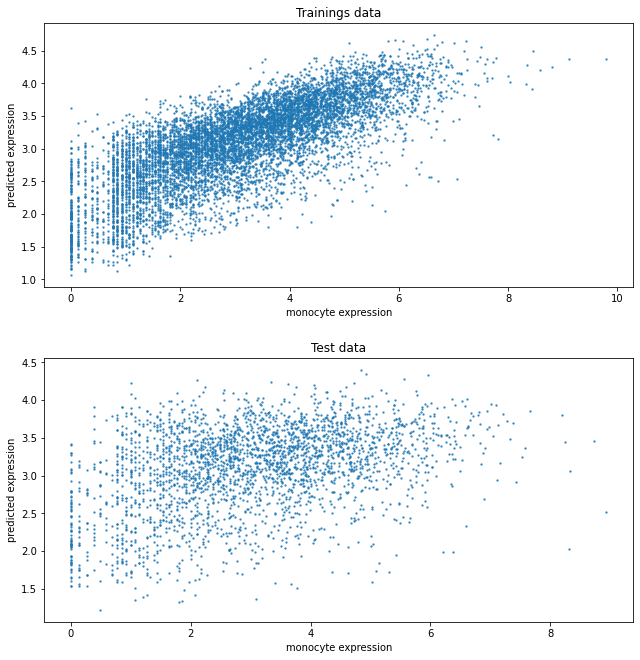

In [6]:
##plot real expression against predicted expression 

fig, axs = plt.subplots(2, figsize = (10,10))
fig.tight_layout(pad=5.0)
axs[0].set_xlabel("monocyte expression")
axs[0].set_ylabel("predicted expression")
axs[1].set_xlabel("monocyte expression")
axs[1].set_ylabel("predicted expression")
axs[0].scatter(train_new.loc[:,'monocytes'], train_new.loc[:,'predicted'], s = 2, alpha = 0.7)
axs[0].set_title("Trainings data")
axs[1].scatter(test_new.loc[:,'monocytes'], test_new.loc[:,'predicted'], s = 2, alpha = 0.7)
axs[1].set_title("Test data")


In [7]:
##print correlation
print("IH01 training set: \n", train_new[['monocytes', 'predicted']].corr())
print("IH01 test set: \n", test_new[['monocytes', 'predicted']].corr())

IH01 training set: 
            monocytes  predicted
monocytes   1.000000   0.747442
predicted   0.747442   1.000000
IH01 test set: 
            monocytes  predicted
monocytes   1.000000   0.382978
predicted   0.382978   1.000000


In [71]:
from sklearn import metrics

##score rf model

display('Trainings score: ', rf.score(train_new.drop(["monocytes","predicted"], axis = 1), train_new.loc[:,'monocytes']))
display('Trainings RMSE: ', metrics.mean_squared_error(train_new.loc[:,'monocytes'], train_new.loc[:,'predicted']))
display('Test score: ', rf.score(test_new.drop(["monocytes","predicted"], axis = 1), test_new.loc[:,'monocytes']))
display('Test RMSE: ',metrics.mean_squared_error(test_new.loc[:,'monocytes'], test_new.loc[:,'predicted']))


'Trainings score: '

0.26961362494088315

'Trainings RMSE: '

1.8339064208313245

'Test score: '

0.14689189938272174

'Test RMSE: '

2.151139984305018

## Feature importances 

In [114]:
# get feature importances
importance = rf.feature_importances_
imp_features = pd.DataFrame(columns = ['feature', 'importance'])


# summarize feature importances
for i,v in enumerate(importance):
    imp_features.loc[i,:] = [train.columns[i],v]

imp_features.sort_values(by = 'importance', ascending = False)

,feature,importance
23,mean_cov_2k,0.053435
22,variance_cov_2k,0.050819
2,199,0.045286
16,mean_cov_body1kb,0.045152
1,202,0.044526
3,196,0.037848
0,205,0.034913
34,amp1,0.03387
35,amp2,0.030073
9,180,0.029317


## Test model on other samples

In [66]:
##predict expression of a cancer sample (IC17)

features_IC17.loc[:,'predicted'] = rf.predict(np.array(features_IC17.drop(["monocytes"], axis = 1)))

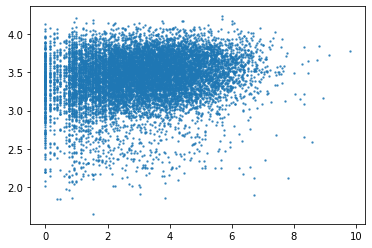

In [67]:
##plot real expression against predicted expression
plt.scatter(features_IC17.loc[:,'monocytes'], features_IC17.loc[:,'predicted'], s = 2, alpha = 0.7)

In [41]:
##print correlation 
features_IC17[['monocytes', 'predicted']].corr()

,monocytes,predicted
monocytes,1.000000,0.185608
predicted,0.185608,1.000000


# Compare predictions 

## Differentially predicted (expressed) genes 

In [46]:
##dataframe for differentially expressed genes
de_genes = pd.DataFrame(index = features_IC17.index)
de_genes["diff"] = 0
de_genes

,diff
ENSG00000000419,0
ENSG00000000457,0
ENSG00000000460,0
ENSG00000000938,0
ENSG00000001036,0
...,...
ENSG00000126217,0
ENSG00000109956,0
ENSG00000206538,0
ENSG00000185272,0


In [61]:
features_IH01 = train_new.append(test_new)
features_IH01_ordered = features_IH01.loc[features_IC17.index,:]

array([ True,  True,  True, ...,  True,  True,  True])

In [62]:
##calculate differences in expression of IC17
for g in features_IC17.index: 
    de_genes.loc[g, "diff"] = max(features_IC17.loc[g,'predicted'] - features_IH01_ordered.loc[g,'predicted'], features_IH01_ordered.loc[g,'predicted'] - features_IC17.loc[g,'predicted'])
    

In [63]:
##get 500 most differentially expressed genes 
de_genes_top500 = de_genes.nlargest(500, columns = "diff")

In [64]:
de_genes_top500.index


Index(['ENSG00000162366', 'ENSG00000135480', 'ENSG00000250120',
       'ENSG00000154065', 'ENSG00000196689', 'ENSG00000176909',
       'ENSG00000176658', 'ENSG00000115363', 'ENSG00000180089',
       'ENSG00000137809',
       ...
       'ENSG00000019549', 'ENSG00000167216', 'ENSG00000267179',
       'ENSG00000109771', 'ENSG00000149260', 'ENSG00000170545',
       'ENSG00000145217', 'ENSG00000159917', 'ENSG00000166762',
       'ENSG00000174567'],
      dtype='object', length=500)

### Save top 500 and background genes (GeneOrganizer, David) 

In [65]:
pd.DataFrame(index = de_genes_top500.index).to_csv("cfDNA-reanalysis_Graz/kristin/rf_model/IC17/de_genes500.csv") 
pd.DataFrame(index = de_genes.index).to_csv("cfDNA-reanalysis_Graz/kristin/rf_model/background_genes.csv") 

In [66]:
de_genes_top500

,diff
ENSG00000162366,2.658698
ENSG00000135480,2.290151
ENSG00000250120,2.260864
ENSG00000154065,2.250567
ENSG00000196689,2.234371
...,...
ENSG00000170545,1.455839
ENSG00000145217,1.455223
ENSG00000159917,1.454548
ENSG00000166762,1.454435


### GSEA 

In [268]:
import pybiomart as pbm 

##get biomart dataset 
dataset = pbm.Dataset(name='hsapiens_gene_ensembl', host='http://www.ensembl.org')

In [112]:
##get gene name for each gene id in de_genes
names = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name'])
de_genes_top500 = de_genes_top500.merge(names, left_index = True, right_on = 'Gene stable ID')
de_genes_top500

,diff,Gene stable ID,Gene name
53984,6.034852,ENSG00000087086,FTL
63119,5.830747,ENSG00000163220,S100A9
54265,5.624382,ENSG00000090382,LYZ
63122,5.446274,ENSG00000143546,S100A8
41536,5.377751,ENSG00000085265,FCN1
...,...,...,...
66069,3.104480,ENSG00000180902,D2HGDH
42618,3.102744,ENSG00000177363,LRRN4CL
24054,3.102378,ENSG00000182108,DEXI
45656,3.097899,ENSG00000149806,FAU


In [41]:
##display gene sets
names = gp.get_library_name()
names

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'Cancer_Cell_Line_Encyclopedia',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbations_from_GEO_up',
 'Disease_Signatures_from_GEO_down_2014',
 'Disease_Signatures_from_GEO_up_2

In [113]:
import gseapy as gp 

##enrichment analysis of de_genes 
enr = gp.enrichr(gene_list= list(de_genes_top500['Gene name']),
                 gene_sets=['Cancer_Cell_Line_Encyclopedia','MSigDB_Oncogenic_Signatures'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 description='DE_genes',
                 outdir='cfDNA-reanalysis_Graz/kristin/rf_model/gsea/',
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )

In [114]:
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Cancer_Cell_Line_Encyclopedia,HS571T OVARY,17/222,0.000046,0.040720,0,0,3.312781,33.068473,SLC24A3;PDE1C;SUSD2;EBF2;SOD3;CYGB;PARD3B;LRRN...
1,Cancer_Cell_Line_Encyclopedia,HS172T URINARY TRACT,13/150,0.000104,0.045688,0,0,3.772823,34.611258,SPON2;RARRES2;TMEM176B;TACR1;SOD3;CYGB;DLL4;SA...
2,Cancer_Cell_Line_Encyclopedia,WM115 SKIN,15/201,0.000170,0.049853,0,0,3.211506,27.879506,FLT1;PDE1C;CPXM2;LGI4;SLC35F1;TMEM171;FRMD5;MC...
3,Cancer_Cell_Line_Encyclopedia,HS675T LARGE INTESTINE,13/169,0.000339,0.069048,0,0,3.310062,26.447227,SPON2;FLT1;RARRES2;TMEM176B;CYGB;PARD3B;SGCD;G...
4,Cancer_Cell_Line_Encyclopedia,COLO783 SKIN,12/150,0.000398,0.069048,0,0,3.450107,27.009930,GPR143;MC1R;FLT1;SGCD;RTN4RL1;ADAMTS17;ALX1;SL...
